In [1]:
import time
import ROOT
import math
import numpy as np
import pandas as pd
import root_pandas as rpd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.colors import LogNorm
from root_pandas import read_root
from __future__ import division
from statsmodels.stats.proportion import proportion_confint
%run functions.ipynb

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.
Welcome to JupyROOT 6.14/06


In [2]:
def geteff(nRec, nEvt):
    y = []
    yerr = []
    for i in range(0, len(nEvt)):
        if nEvt[i] == 0:
            y.append(0)
            yerr.append([0,0])
        else:
            y.append(nRec[i] / nEvt[i])
            a = abs(proportion_confint(nRec[i], nEvt[i], 1 - 0.68, 'jeffreys') - nRec[i] / nEvt[i])
            yerr.append(a)
    return y, np.asarray(yerr).T

In [3]:
def getDataAll(inputFiles):
    cols = []
    scalar = []
    scalar.append('event')
    cols.append('all_truthNComponent')
    cols.append('all_truthE')
    cols.append('all_truthEta')

    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists+cols,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print '\n', 'Processed', inputFilename, 'in',  '%2.1f'%(end-start), 'seconds'
    return pd.concat([x for x in dataframes])

In [4]:
def getDataMatched(inputFiles):
    cols = []
    scalar = []
    scalar.append('event')
    cols.append('matched_truthNComponent')
    cols.append('matched_truthE')
    cols.append('matched_truthEta')

    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists+cols,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print '\n', 'Processed', inputFilename, 'in',  '%2.1f'%(end-start), 'seconds'
    return pd.concat([x for x in dataframes])

In [5]:
file1 = ["$HOME/EIC/output/sphenix/619.root"]

In [6]:
a = getDataAll(file1)
b = getDataMatched(file1)


Processed $HOME/EIC/output/sphenix/619.root in 1.5 seconds

Processed $HOME/EIC/output/sphenix/619.root in 1.2 seconds


In [7]:
# check if there is any jet in "matched" but not in "all"
for i in range(0, 101):
    match = np.asarray(b['matched_truthEta'])[i]
    if i != 0 and i % 100 == 0:
        print "checked", i, "jets"
    if math.isnan(match) == False:
        for j in range(i, len(a)):
            alll = np.asarray(a['all_truthEta'])[j]
            if match == alll:
                break
            if j == len(a)-1:
                print b.loc[[i]]

checked 100 jets


In [8]:
# check if there is any duplicated "matched" jet
row_dup = []
for i in range(0, len(b)):
    match = np.asarray(b['matched_truthEta'])[i]
    if i < len(b)-30:
        end = i + 31
    else:
        end = len(b)
    for j in range(i+1, end):
        match2 = np.asarray(b['matched_truthEta'])[j]
        if match == match2:
            #print b.loc[[i]]
            #print b.loc[[j]]
            row_dup.append(i)
#print row_dup
print len(row_dup), "pairs of duplicated matched jets found"

2323 pairs of duplicated matched jets found


In [9]:
# remove rows that correspond to the duplicated "matched" jets
b0 = b.drop(row_dup)

In [22]:
a1 = applyCut(a, 'all_truthNComponent > 1', 'all_truthNComponent')
a1 = applyCut(a1, 'all_truthE > 5', 'all_truthE')

all_truthNComponent 303052  fraction kept: 83.2
all_truthE 180883  fraction kept: 59.7


In [23]:
b1 = applyCut(b0, 'matched_truthNComponent > 1', 'matched_truthNComponent')
b1 = applyCut(b1, 'matched_truthE > 5', 'matched_truthE')

matched_truthNComponent 81151  fraction kept: 88.3
matched_truthE 49032  fraction kept: 60.4


In [12]:
etaedges = np.arange(-1.1, 1.2, 0.1)

In [13]:
a_arr = partitionEta(a, etaedges, etaname = 'all_truthEta')
b_arr = partitionEta(b0, etaedges, etaname = 'matched_truthEta')

-1.1 < all_truthEta < -1.0 3169  fraction kept: 0.9
-1.0 < all_truthEta < -0.8999999999999999 3302  fraction kept: 0.9
-0.8999999999999999 < all_truthEta < -0.7999999999999998 3464  fraction kept: 1.0
-0.7999999999999998 < all_truthEta < -0.6999999999999997 3749  fraction kept: 1.0
-0.6999999999999997 < all_truthEta < -0.5999999999999996 3984  fraction kept: 1.1
-0.5999999999999996 < all_truthEta < -0.49999999999999956 4153  fraction kept: 1.1
-0.49999999999999956 < all_truthEta < -0.39999999999999947 4383  fraction kept: 1.2
-0.39999999999999947 < all_truthEta < -0.2999999999999994 4518  fraction kept: 1.2
-0.2999999999999994 < all_truthEta < -0.1999999999999993 4873  fraction kept: 1.3
-0.1999999999999993 < all_truthEta < -0.0999999999999992 5030  fraction kept: 1.4
-0.0999999999999992 < all_truthEta < 8.881784197001252e-16 5299  fraction kept: 1.5
8.881784197001252e-16 < all_truthEta < 0.10000000000000098 5397  fraction kept: 1.5
0.10000000000000098 < all_truthEta < 0.20000000000000

In [24]:
a1_arr = partitionEta(a1, etaedges, etaname = 'all_truthEta')
b1_arr = partitionEta(b1, etaedges, etaname = 'matched_truthEta')

-1.1 < all_truthEta < -1.0 1489  fraction kept: 0.8
-1.0 < all_truthEta < -0.8999999999999999 1584  fraction kept: 0.9
-0.8999999999999999 < all_truthEta < -0.7999999999999998 1534  fraction kept: 0.8
-0.7999999999999998 < all_truthEta < -0.6999999999999997 1551  fraction kept: 0.9
-0.6999999999999997 < all_truthEta < -0.5999999999999996 1569  fraction kept: 0.9
-0.5999999999999996 < all_truthEta < -0.49999999999999956 1517  fraction kept: 0.8
-0.49999999999999956 < all_truthEta < -0.39999999999999947 1490  fraction kept: 0.8
-0.39999999999999947 < all_truthEta < -0.2999999999999994 1514  fraction kept: 0.8
-0.2999999999999994 < all_truthEta < -0.1999999999999993 1571  fraction kept: 0.9
-0.1999999999999993 < all_truthEta < -0.0999999999999992 1650  fraction kept: 0.9
-0.0999999999999992 < all_truthEta < 8.881784197001252e-16 1659  fraction kept: 0.9
8.881784197001252e-16 < all_truthEta < 0.10000000000000098 1667  fraction kept: 0.9
0.10000000000000098 < all_truthEta < 0.20000000000000

In [15]:
x = np.arange(-1.05, 1.15, 0.1)

In [16]:
nRec = []
nEvt = []
for i in range(0, len(etaedges)-1):
    nRec.append(len(b_arr[i]))
    nEvt.append(len(a_arr[i]))

In [25]:
nRec_cut = []
nEvt_cut = []
for i in range(0, len(etaedges)-1):
    nRec_cut.append(len(b1_arr[i]))
    nEvt_cut.append(len(a1_arr[i]))

In [18]:
y, yerr = geteff(np.asarray(nRec), np.asarray(nEvt))

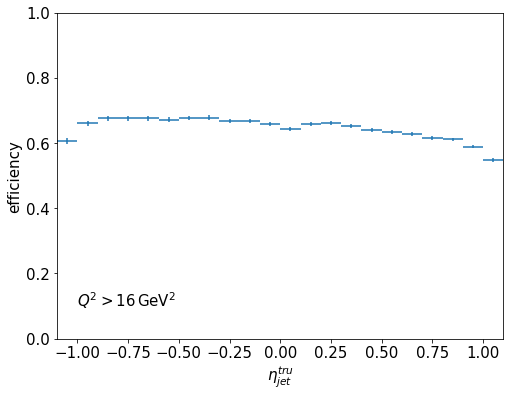

In [20]:
fig = plt.figure(figsize=(8,6))
plt.errorbar(x, y, xerr=0.05, yerr=yerr, fmt='none')
plt.xlim(left=-1.1, right=1.1)
plt.ylim(bottom=0, top=1)
plt.xlabel('$\eta^{tru}_{jet}$', fontsize=15)
plt.ylabel('efficiency', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.text(-1, 0.1, '$Q^2 > 16 \, \mathrm{GeV^2}$', fontsize=15)
plt.savefig('images/eff_no_cut.png', bbox_inches='tight')

In [26]:
y, yerr = geteff(np.asarray(nRec_cut), np.asarray(nEvt_cut))

In [ ]:
fig = plt.figure(figsize=(8,6))
plt.errorbar(x, y, xerr=0.05, yerr=yerr, fmt='none')
plt.xlim(left=-1.1, right=1.1)
plt.ylim(bottom=0, top=1)
plt.xlabel('$\eta^{tru}_{jet}$', fontsize=15)
plt.ylabel('efficiency', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.text(-1, 0.1, '$Q^2 > 16 \, \mathrm{GeV^2}$ \n $N^{tru}_{jet} \geq 2$ \n $E^{tru}_{jet} > 5 \, \mathrm{GeV}$', fontsize=15)
plt.savefig('images/eff1.png', bbox_inches='tight')